# 6/14 Practice
### Q1 ) 부모의 학력과 자녀의 대학진학여부 관계 검토

- cleanDescriptive.csv 파일을 읽어와 level2와 pass2 변수를 이용해
- 부모의 학력과 자녀의 대학진학여부가 관계가 있는지 검토 실시

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [6]:
df=pd.read_csv('cleanDescriptive.csv', encoding='euc-kr')

In [8]:
df.head()

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0,2.0,특별시,남자,장년층,고졸,실패
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0,2.0,광역시,남자,장년층,대졸,실패
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0,2.0,NaN,남자,노년층,대졸,합격
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0,NaN,광역시,여자,장년층,NaN,합격
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0,2.0,시구군,남자,장년층,고졸,합격


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
resident     231 non-null float64
gender       248 non-null int64
age          248 non-null int64
level        236 non-null float64
cost         248 non-null float64
type         235 non-null float64
survey       160 non-null float64
pass         235 non-null float64
cost2        165 non-null float64
resident2    231 non-null object
gender2      248 non-null object
age2         248 non-null object
level2       236 non-null object
pass2        235 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 27.2+ KB


In [11]:
df_cross=pd.crosstab(df['level2'], df['pass2'])

In [12]:
df_cross

pass2,실패,합격
level2,,
고졸,40,49
대졸,27,55
대학원졸,23,31


## 가설 
H0 : 부모의 학력과 자녀의 대학진학 여부는 관계가 없다  
H1 : 부모의 학력과 자녀의 대학진학 여부는 관계가 있다

In [14]:
chic2, p,dof,ef=stats.chi2_contingency(df_cross, correction=False) # correction =False : p-value더 낮게 생성해줌 

In [15]:
p #p-value

0.25070568406521354

### Result
p-value=0.2507 > 0.05이므로 유의수준 0.05에 대해 귀무가설을 채택  
그러므로 부모의 학력과 자녀의 대학진학 여부는 관계 없음

## Q2. diamonds 분석

seaborn 라이브러리의 diamonds 데이터셋을 활용해 아래를 수행해보세요

- 데이터 로드 방법

sns.load_dataset('diamonds')

​

2-1) price와 상관성이 높은 변수는? 

2-2) price 변수의 확률밀도함수로 분포 확인 

2-3) 아래의 조건에 따라 price2변수를 범주형 변수로 생성 

- 1분위수 미만: 'low'

- iqr : 'mid'

- 윗 극단치 경계 이하 : 'high'

- 15000미만 : 'vh' (very high)

- 그 이상 : 'sp' (special)

2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단

In [17]:
import seaborn as sns

In [18]:
dt=sns.load_dataset('diamonds')

In [19]:
dt.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### 2-1) price와 상관성이 높은 변수는?
상관분석 결과 price와 상관성이 제일 높은 변수는 carat임

In [28]:
dt.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### 2-2) price 변수의 확률밀도함수로 분포 확인

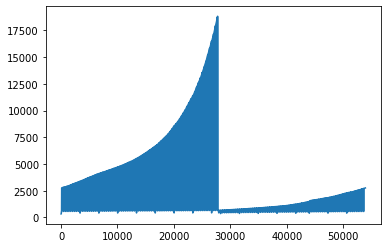

In [36]:
import matplotlib.pyplot as plt
plt.plot(dt['price'])

### 2-3) 아래의 조건에 따라 price2변수를 범주형 변수로 생성 

- 1분위수 미만: 'low'

- iqr : 'mid' (4분위 범위)

- 윗 극단치 경계 이하 : 'high'

- 15000미만 : 'vh' (very high)

- 그 이상 : 'sp' (special)


### 풀이
1) price< Q1 : low  
2) Q1<= price< iqr : mid  
3) iqr<= price < outvalue : high  
4) outvalue<= price < 15000 : vh  
5) 15000 <= price : sp  



In [38]:
dt.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
def solve(price):
    Q1 = dt['price'].quantile(.25) # 1분위 수
    Q3 = dt['price'].quantile(.75) 
    iqr=Q3-Q1 #4분위 범위
    outvalue=iqr*1.5 #극단치
    if price<Q1:
        price2='low'
    elif Q1<=price<iqr:
        price2='mid'
    elif iqr<=price<outvalue:
        price2='high'
    elif outvalue<=price<15000:
        price2='vh'
    else:
        price2='sp'

    return price2

In [52]:
dt['price2']=dt['price'].apply(solve)

In [55]:
dt.price2.unique()

array(['low', 'mid', 'high', 'vh', 'sp'], dtype=object)

### 2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단
- H0 : cut과 price2는 서로 관련이 없다
- H1 : cut과 price2는 서로 관련이 있다.

In [57]:
dt_cross=pd.crosstab(dt['cut'], dt['price2'])

In [58]:
dt_cross

price2,high,low,mid,sp,vh
cut,,,,,
Ideal,2200,6304,9482,532,3033
Premium,2296,2905,5328,587,2675
Very Good,1812,3129,4867,367,1907
Good,807,1057,2245,129,668
Fair,259,88,980,41,242


In [59]:
chic2, p,dof,ef=stats.chi2_contingency(dt_cross, correction=False) # correction =False : p-value더 낮게 생성해줌 

In [60]:
p

3.6838466075799517e-271

### Result
p-value=3.68*e-271<0.05이므로 귀무가설을 기각한다.  
그러므로 cut과 price2는 서로 관련이 있다.